In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import xarray as xr

import opensense_data_downloader_and_transformer as oddt

# Single E-band CML data from Czech Republic
source: https://zenodo.org/record/5013463/files/Dataset_1.0.0.zip

Note that this dataset contains much more than just the CML data, but for now we only parse the CML data.

In [3]:
oddt.download_fencl_2021_Eband_data(local_path='data/fencl_2021_Eband_data', print_output=True);

Creating path data/fencl_2021_Eband_data
to data/fencl_2021_Eband_data/Dataset_1.0.0.zip


In [4]:
ds = oddt.tranform_fencl_2021_Eband_data('data/fencl_2021_Eband_data/Dataset_1.0.0.zip')
ds

<xarray.Dataset>
Dimensions:           (sublink_id: 2, time: 59328)
Coordinates:
  * time              (time) datetime64[ns] 2019-03-10 ... 2019-10-01T23:55:00
    cml_id            <U16 'cz_example_cml_1'
    length            float64 4.866
  * sublink_id        (sublink_id) <U2 'ab' 'ba'
    site_a_longitude  float64 14.53
    site_b_longitude  float64 14.53
    site_a_latitude   float64 50.03
    site_b_latitude   float64 50.03
Data variables:
    trsl              (sublink_id, time) float64 50.3 50.3 50.2 ... 50.2 50.3
    frequency         (sublink_id) float64 73.5 83.5

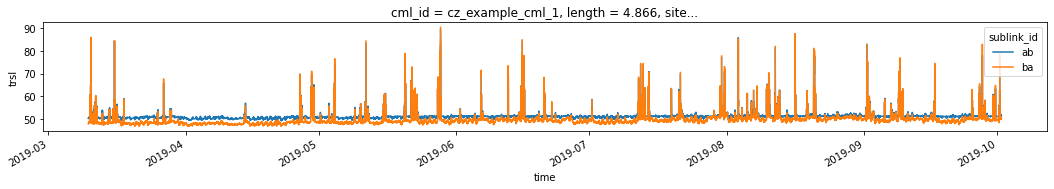

In [5]:
ds.trsl.plot.line(x='time', figsize=(18,2));

# Data from 6 Eband CMLs from Czech Republic

In [6]:
oddt.download_fencl_2020_Eband_data(
    local_path='data/fencl_2020_Eband_CML',
    print_output=True,
)

Creating path data/fencl_2020_Eband_CML
to data/fencl_2020_Eband_CML/dataset.zip


('data/fencl_2020_Eband_CML/dataset.zip',
 <http.client.HTTPMessage at 0x15a3f3fd0>)

In [7]:
ds_list = oddt.transform_fencl_2020_Eband_data('data/fencl_2020_Eband_CML/dataset.zip')

Parsing raw data from raw/commercial_microwave_links_total_loss/1a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/1b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/2a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/2b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/3a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/3b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/4a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/4b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/5a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/5b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/6a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/6b.csv


## Plot the time series
Note that the two sublinks are combined manually because we do not store them in a joint `xarray.Dataset` to preserve the raw unequally spaced time stamps.

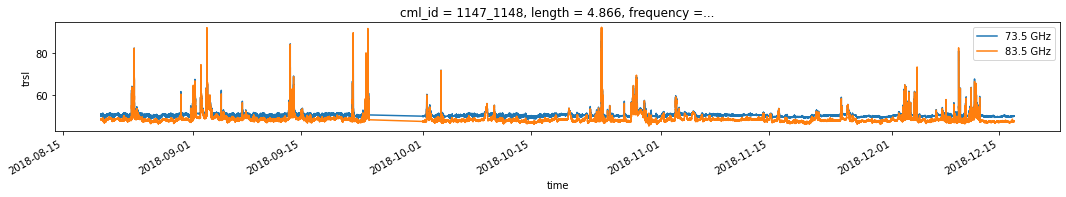

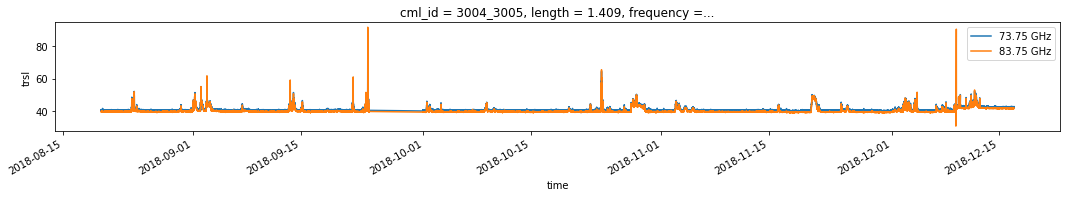

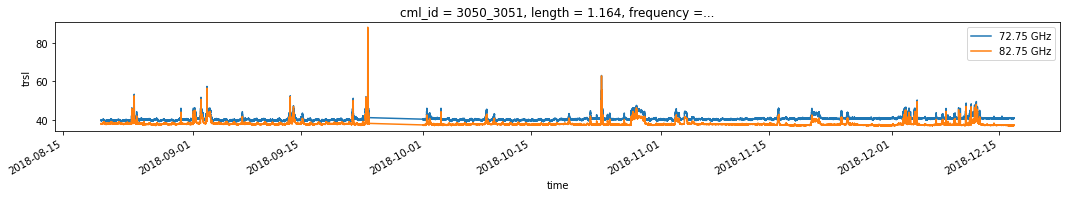

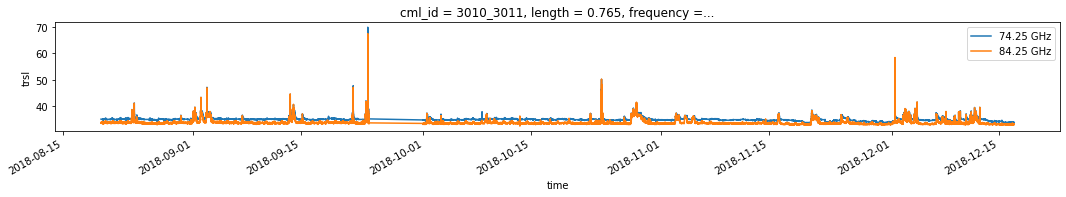

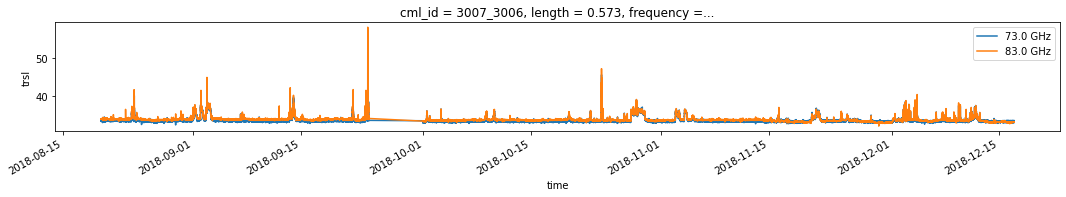

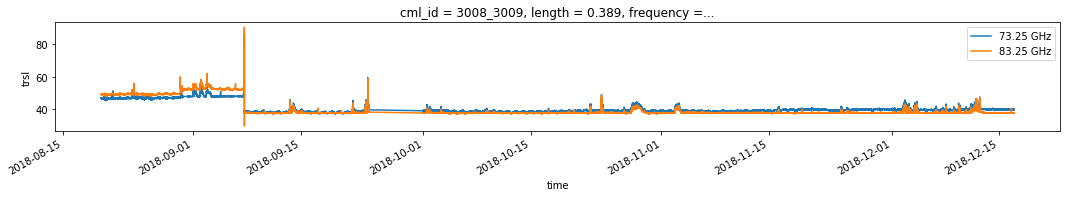

In [8]:
for i, ds in enumerate(ds_list):
    if i%2 == 0:
        fig, ax = plt.subplots(figsize=(18, 2))
    ds.trsl.plot(x='time', ax=ax, label=f'{ds.frequency.values} GHz');
    plt.legend(loc=1)

# Example data from German CMLs with fake coordinates
Provided as example data in `pycomlink`

In [9]:
oddt.download_data_file(
    url='https://github.com/pycomlink/pycomlink/raw/master/pycomlink/io/example_data/example_cml_data.nc',
    local_path='data/pycomlink_example_data',
    print_output=True,
)

Creating path data/pycomlink_example_data
to data/pycomlink_example_data/example_cml_data.nc


('data/pycomlink_example_data/example_cml_data.nc',
 <http.client.HTTPMessage at 0x16866c280>)

In [10]:
ds = xr.open_dataset('data/pycomlink_example_data/example_cml_data.nc')
ds

<xarray.Dataset>
Dimensions:           (time: 15840, cml_id: 500, channel_id: 2)
Coordinates:
  * time              (time) datetime64[ns] 2018-05-10 ... 2018-05-20T23:59:00
  * cml_id            (cml_id) object 'FY0013_2_FY1257_3' ... 'SY8534_2_SY237...
    length            (cml_id) float64 ...
    site_a_latitude   (cml_id) float64 ...
    site_a_longitude  (cml_id) float64 ...
    site_b_latitude   (cml_id) float64 ...
    site_b_longitude  (cml_id) float64 ...
  * channel_id        (channel_id) object 'channel_1' 'channel_2'
    frequency         (cml_id, channel_id) float64 ...
    polarization      (cml_id, channel_id) object ...
Data variables:
    rsl               (channel_id, cml_id, time) float32 ...
    tsl               (channel_id, cml_id, time) float32 ...

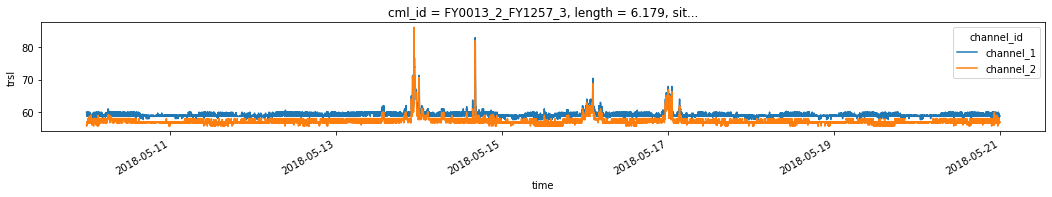

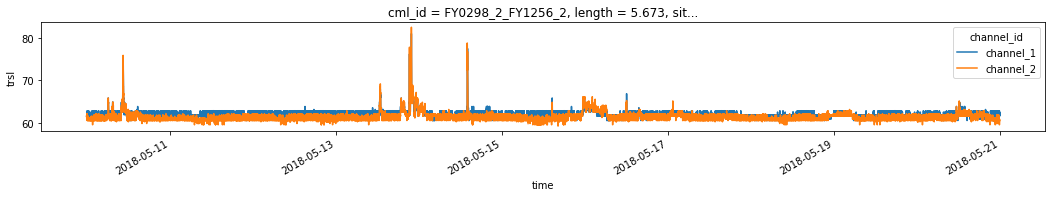

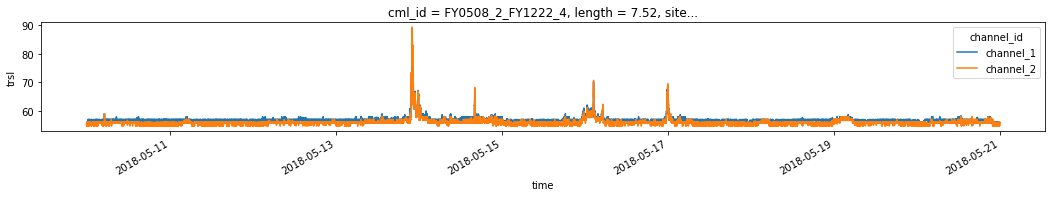

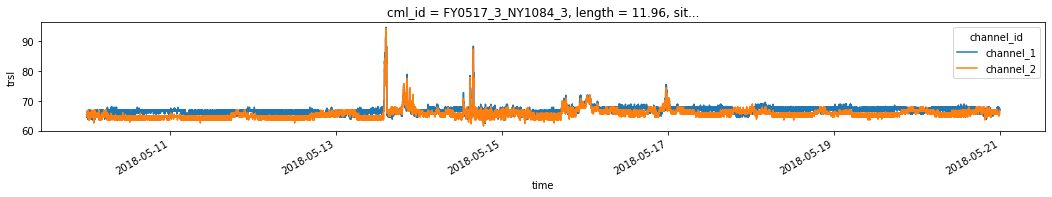

In [11]:
# Set defaul fill values to NaN
ds['tsl'] = ds.tsl.where(ds.tsl != 255.0)
ds['rsl'] = ds.rsl.where(ds.rsl != -99.9)
# Calculate TRSL
ds['trsl'] = ds.tsl - ds.rsl

# Plot
for i in range(4):
    ds.isel(cml_id=i).trsl.plot.line(x='time', figsize=(18,2));

# OpenMRG dataset from SMHI with large CML dataset
source: https://zenodo.org/record/6673751

Note that OpenMRG also contains reference data from rain gauges and weather radar data, but for now we focus only on the CML data.

In [12]:
oddt.download_andersson_2022_OpenMRG(local_path='data/andersson_2022_OpenMRG/', print_output=True)

File already exists at desired location data/andersson_2022_OpenMRG/OpenMRG.zip
Not downloading!


In [13]:
ds = oddt.transform_andersson_2022_OpenMRG(
    fn='data/andersson_2022_OpenMRG/OpenMRG.zip', 
    path_to_extract_to='data/andersson_2022_OpenMRG/',
)

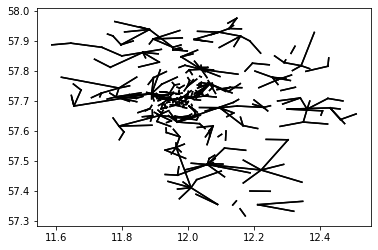

In [14]:
import matplotlib.pyplot as plt
for lon1, lat1, lon2, lat2 in zip(
    ds.site_a_longitude, 
    ds.site_a_latitude,
    ds.site_b_longitude, 
    ds.site_b_latitude):
    
    plt.plot([lon1, lon2], [lat1, lat2], "-", c="black")

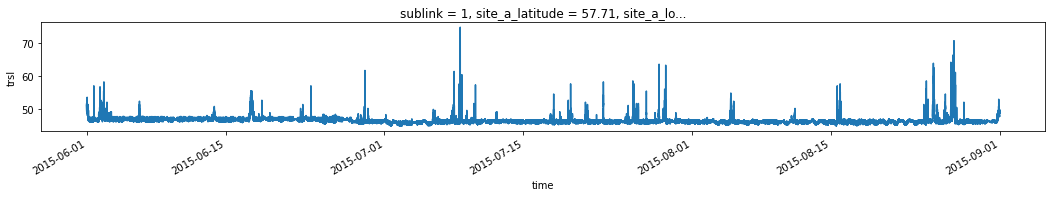

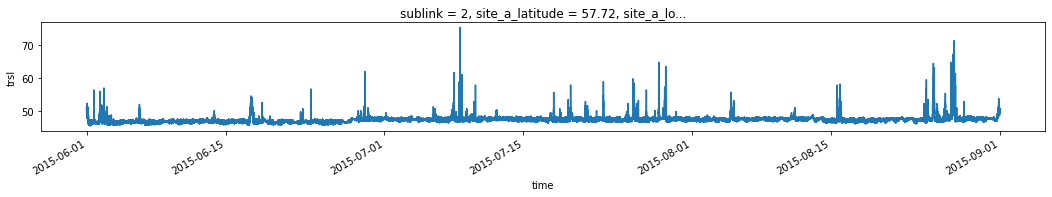

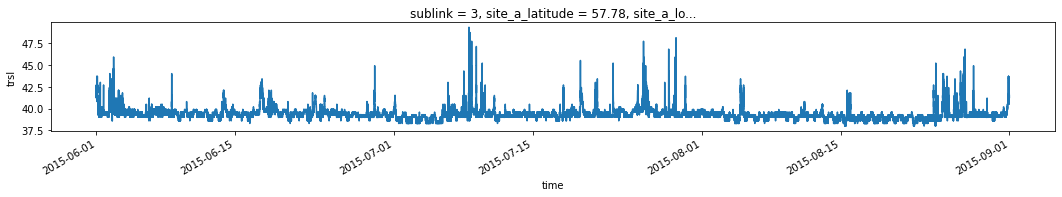

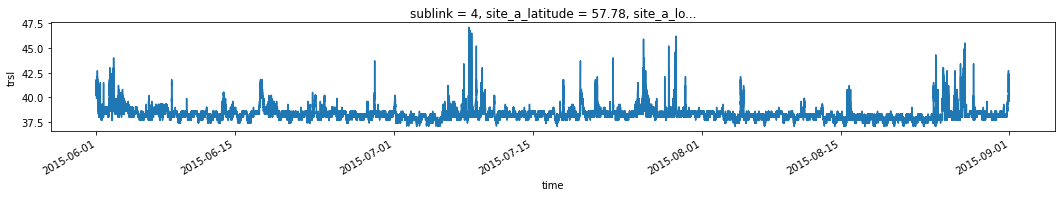

In [15]:
# Calculate TRSL
ds['trsl'] = ds.tx - ds.rx

# Plot
for i in range(4):
    ds.isel(sublink=i).trsl.plot.line(x='time', figsize=(18,2));